In [1]:
import json
import pandas as pd
import seaborn

from scripts.analysis import *
from scripts.data_processing import process_trials

In [2]:
# set1 SAME players condition block trials: p2b_s11, p2a_s31, p2b_s02

with open('./trial_setups/p2b_s11.json', 'r') as f:
    bs11 = json.load(f)
    bs11 = pd.DataFrame.from_dict(bs11)

with open('./trial_setups/p2b_s02.json', 'r') as f:
    bs02 = json.load(f)
    bs02 = pd.DataFrame.from_dict(bs02)
    
with open('./trial_setups/p2a_s31.json', 'r') as f:
    as31 = json.load(f)
    as31 = pd.DataFrame.from_dict(as31)

In [4]:
# load normalized reverse-coded honesty ratings, i.e. normalized suspicion ratings

with open('final_pilot_sameplayer_normalized_suspicion_ratings.json', 'r') as f:
    ratings = json.load(f)

In [3]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

# Use a service account
cred = credentials.Certificate('D:/Behavioural cybersecurity/project-notes/cards-dd-game-61b9b7f26a6e.json')
firebase_admin.initialize_app(cred)

db = firestore.client()

subjects_ref = db.collection(u'subjects')

In [5]:
uuids = ratings.keys()

In [6]:
tmp = []

for uuid in uuids:
    tmp.append(subjects_ref.document(uuid).get())

In [7]:
condition = {}

for i, uuid in enumerate(uuids):
#     print(i)
    cond = tmp[i].to_dict()['condition']
    condition[uuid] = cond

In [8]:
from skopt.space import Real

param_search_space = [Real(0, 1, name='prior'), Real(0, 1, name='alpha')]

In [17]:
def skopt_fit_single_model_single_response(response, trials, param_search_space, stat: str):
    ss_tot = np.sum((response - np.mean(response)) ** 2)
    
    gp_result = gp_minimize(
        partial(objective_single_model, response=response, trials=trials, stat=stat),
        param_search_space, random_state=42)
    optimal_ss_res = gp_result.fun
    
    print("Best parameter estimates: prior =", (gp_result.x[0], "alpha =", gp_result.x[1]))
    print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
    
    pred = gp_result.x[0] + gp_result.x[1] * trials[stat]
    
    mse = mean_squared_error(response, pred)
    bic = calculate_bic(len(response), mse, len(param_search_space))
    aic = calculate_aic(len(response), mse, len(param_search_space))
    
    print("BIC:", bic)
    print("AIC:", aic)
    print("=" * 100)

In [43]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
    skopt_fit_single_model_single_response(hrs, trials, param_search_space, 'normed_signed_colour_count')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.35469351769242136, 'alpha =', 0.0010799446749182318)
R2: -4.89628389743757e-06
BIC: -188.65020747202206
AIC: -193.6498268126826
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.34933826631341897, 'alpha =', 0.16406834027505943)
R2: 0.008912574026121667
BIC: -170.19629603175656
AIC: -175.1959153724171
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.29633706081354316, 'alpha =', 0.0)
R2: -6.601700586195136e-08
BIC: -322.384348911242
AIC: -327.3839682519025
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.5592627255880298, 'alpha =', 0.0)
R2: -1.0174527886874785e-10
BIC: -183.2656230759094
AIC: -188.26524241656992
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.49995154831025107, 'alpha =', 0.0)
R2: -1.625238410518648e-08
BIC: -165.1378073573489
AIC: -170.13742669800942
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.4111020192786261, 'alpha =', 0.0)
R2: -5.999616359275706e-10
BIC: -169.39056840278724
AIC: -174.39018774344777
60ff0201788cef38c8695833
Subject 7
Subject 7
Best paramete

In [42]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
    skopt_fit_single_model_single_response(hrs, trials, param_search_space, 'normed_unsigned_colour_count')

611e4e160f41977f737035ef
Subject 0
Best parameter estimates: prior = (0.3553887031091102, 'alpha =', 0.0)
R2: -2.50279558189348e-07
BIC: -188.6506256113366
AIC: -193.65024495199714
6112b4cdd72db936075c0db8


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.4110071519234649, 'alpha =', 0.0)
R2: -7.844163274484117e-08
BIC: -169.3905613989242
AIC: -174.39018073958474
6108512871ec370e525ef4f0
Subject 3
Best parameter estimates: prior = (0.29624618415933757, 'alpha =', 0.0)
R2: -9.976483883455955e-08
BIC: -322.38434587393726
AIC: -327.38396521459777
611e717148e6b271f0b70d6f
Subject 4
Best parameter estimates: prior = (0.5592334806115051, 'alpha =', 0.0)
R2: -5.627235566407762e-09
BIC: -183.26562257861525
AIC: -188.26524191927578
5f415bea2ba0682e7fc98fbf
Subject 5
Best parameter estimates: prior = (0.49991629637899576, 'alpha =', 0.0)
R2: -4.850513102283571e-08
BIC: -165.13780445460176
AIC: -170.1374237952623
611e6e0371738becff3551d8
Subject 6
Best parameter estimates: prior = (0.4109418483769958, 'alpha =', 0.0)
R2: -2.079426251189176e-07
BIC: -169.39054974194948
AIC: -174.39016908261002
60ff0201788cef38c8695833
Subject 7
Best parameter estimates: prior = (0.36121762756897824, 'alpha =', 0.0)
R2:

In [38]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
    skopt_fit_single_model_single_response(hrs, trials, param_search_space, 'normed_signed_e_v')

611e4e160f41977f737035ef
Subject 0
Best parameter estimates: prior = (0.33007445530184965, 'alpha =', 0.03983600870018505)
R2: 0.0008141355005977235
BIC: -188.72395017449398
AIC: -193.7235695151545
6112b4cdd72db936075c0db8


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.23530485157157138, 'alpha =', 0.27093218267159735)
R2: 0.03362012650993795
BIC: -172.46841350487503
AIC: -177.46803284553556
6108512871ec370e525ef4f0
Subject 3
Best parameter estimates: prior = (0.2962634052013579, 'alpha =', 0.0)
R2: -4.297821987186978e-08
BIC: -322.3843509847326
AIC: -327.38397032539314
611e717148e6b271f0b70d6f
Subject 4
Best parameter estimates: prior = (0.5592106679014354, 'alpha =', 0.0)
R2: -1.9993686706243352e-08
BIC: -183.26562128563467
AIC: -188.2652406262952
5f415bea2ba0682e7fc98fbf
Subject 5
Best parameter estimates: prior = (0.4999536755177194, 'alpha =', 0.0)
R2: -1.485663192468678e-08
BIC: -165.13780748296662
AIC: -170.13742682362715
611e6e0371738becff3551d8
Subject 6
Best parameter estimates: prior = (0.4111093390936657, 'alpha =', 0.0)
R2: -2.2790214160295363e-11
BIC: -169.3905684547327
AIC: -174.39018779539322
60ff0201788cef38c8695833
Subject 7
Best parameter estimates: prior = (0.361157749012329, 'alpha =

In [41]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
    skopt_fit_single_model_single_response(hrs, trials, param_search_space, 'normed_cs_signed_e_v')

0 611e4e160f41977f737035ef
Subject 0
Best parameter estimates: prior = (0.17099035468924093, 'alpha =', 0.43236584766626024)
R2: 0.09831031395339684
BIC: -197.964284356068
AIC: -202.96390369672852
1 6112b4cdd72db936075c0db8


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
2 611e28b12a630ff00cc467a8


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.27939223998943363, 'alpha =', 0.3995390865107004)
R2: 0.10172147432061951
BIC: -179.04532714761427
AIC: -184.0449464882748
3 6108512871ec370e525ef4f0
Subject 3
Best parameter estimates: prior = (0.05890061996411567, 'alpha =', 0.3537882749631096)
R2: 0.4449031201596416
BIC: -375.3594908506201
AIC: -380.3591101912806
4 611e717148e6b271f0b70d6f
Subject 4
Best parameter estimates: prior = (0.16183743937516482, 'alpha =', 0.6559019455848141)
R2: 0.23512929759454082
BIC: -207.38998591642155
AIC: -212.38960525708208
5 5f415bea2ba0682e7fc98fbf
Subject 5
Best parameter estimates: prior = (0.16900471271586173, 'alpha =', 0.545486218255448)
R2: 0.1336196479106848
BIC: -178.04662232774032
AIC: -183.04624166840085
6 611e6e0371738becff3551d8
Subject 6
Best parameter estimates: prior = (0.25640898899393144, 'alpha =', 0.2638259157162521)
R2: 0.05640902266740455
BIC: -174.6161928678596
AIC: -179.61581220852014
7 60ff0201788cef38c8695833
Subject 7
Best pa

In [39]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
    skopt_fit_single_model_single_response(hrs, trials, param_search_space, 'normed_unsigned_e_v')

0 611e4e160f41977f737035ef
Subject 0
Best parameter estimates: prior = (0.28341059865485435, 'alpha =', 0.12479242529953286)
R2: 0.009309191533544814
BIC: -189.49239949420334
AIC: -194.49201883486387
1 6112b4cdd72db936075c0db8


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
2 611e28b12a630ff00cc467a8


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.41059204807992367, 'alpha =', 5.418441909136173e-05)
R2: -2.852336603575978e-06
BIC: -169.39031174874268
AIC: -174.3899310894032
3 6108512871ec370e525ef4f0
Subject 3
Best parameter estimates: prior = (0.2962775067407331, 'alpha =', 0.0)
R2: -1.4025715033838537e-08
BIC: -322.384353590458
AIC: -327.3839729311185
4 611e717148e6b271f0b70d6f
Subject 4
Best parameter estimates: prior = (0.5592830805855036, 'alpha =', 0.0)
R2: -4.805147391095943e-09
BIC: -183.26562265260318
AIC: -188.26524199326371
5 5f415bea2ba0682e7fc98fbf
Subject 5
Best parameter estimates: prior = (0.4994938014882142, 'alpha =', 0.0014787050291437689)
R2: -7.201782850740912e-06
BIC: -165.13716066194084
AIC: -170.13678000260137
6 611e6e0371738becff3551d8
Subject 6
Best parameter estimates: prior = (0.4111605328728041, 'alpha =', 1.7347234759768065e-18)
R2: -1.7727899814801162e-08
BIC: -169.39056686127282
AIC: -174.39018620193335
7 60ff0201788cef38c8695833
Subject 7
Best parame

In [40]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
    skopt_fit_single_model_single_response(hrs, trials, param_search_space, 'normed_cs_unsigned_e_v')

0 611e4e160f41977f737035ef
Subject 0
Best parameter estimates: prior = (0.13891680338569048, 'alpha =', 0.45155503422390036)
R2: 0.13803674918959208
BIC: -202.01948588929224
AIC: -207.01910522995277
1 6112b4cdd72db936075c0db8


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
2 611e28b12a630ff00cc467a8


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.2238087093659543, 'alpha =', 0.4094654767596288)
R2: 0.1034672987629468
BIC: -179.22041436236745
AIC: -184.22003370302798
3 6108512871ec370e525ef4f0
Subject 3
Best parameter estimates: prior = (0.08060416198477549, 'alpha =', 0.3973949266320079)
R2: 0.48953948186076257
BIC: -382.9041334090291
AIC: -387.90375274968966
4 611e717148e6b271f0b70d6f
Subject 4
Best parameter estimates: prior = (0.26667146644748246, 'alpha =', 0.5516240661458728)
R2: 0.1992507103324922
BIC: -203.2642870670178
AIC: -208.26390640767832
5 5f415bea2ba0682e7fc98fbf
Subject 5
Best parameter estimates: prior = (0.19259435143457315, 'alpha =', 0.580325219229077)
R2: 0.17971173620595815
BIC: -182.96676015595887
AIC: -187.9663794966194
6 611e6e0371738becff3551d8
Subject 6
Best parameter estimates: prior = (0.246573194082294, 'alpha =', 0.31573624132410855)
R2: 0.06240152918733677
BIC: -175.18958265757564
AIC: -180.18920199823617
7 60ff0201788cef38c8695833
Subject 7
Best par

## BLOCK 1 model fits

In [61]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][:30]
    skopt_fit_single_model_single_response(hrs, trials[:30], param_search_space, 'normed_cs_unsigned_e_v')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.22438257169662307, 'alpha =', 0.051301433064561884)
R2: 0.00023371628554280655
BIC: -59.26431413293921
AIC: -64.86910365958784
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.28891335745422725, 'alpha =', 0.0)
R2: -5.056885354903784e-09
BIC: -50.407058296471654
AIC: -56.01184782312028
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.16644007081803208, 'alpha =', 0.0)
R2: -1.6662630264165742e+25
BIC: -489.93575343350136
AIC: -495.54054296015
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.14496544964827893, 'alpha =', 1.0)
R2: 0.1396456699586789
BIC: -47.55075608633172
AIC: -53.15554561298034
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.2550234077618034, 'alpha =', 0.3708370744768304)
R2: 0.024925928644139228
BIC: -63.06353639940074
AIC: -68.66832592604936
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.31668601055806056, 'alpha =', 0.0)
R2: -2.872217574889646e-09
BIC: -47.5378010678901
AIC: -53.142590594538724
60ff0201788cef38c8695833
Subject 7
Subject 7
Best parameter estima

In [63]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][:30]
    skopt_fit_single_model_single_response(hrs, trials[:30], param_search_space, 'normed_cs_signed_e_v')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.22249561242918608, 'alpha =', 0.055926957509186394)
R2: 0.0003104053933205009
BIC: -59.266615432267095
AIC: -64.87140495891572
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.23448435174064325, 'alpha =', 0.9756818275463193)
R2: 0.005506620060574341
BIC: -50.57271356965433
AIC: -56.17750309630296
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.1666968895254108, 'alpha =', 0.0)
R2: -2.964214698186658e+23
BIC: -610.8099971187972
AIC: -616.4147866454458
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.1189383580541485, 'alpha =', 0.7608372559072024)
R2: 0.13962668567186132
BIC: -47.55009412381091
AIC: -53.15488365045953
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.2595123595884917, 'alpha =', 0.23763074433476652)
R2: 0.025764468410848118
BIC: -63.08934676273653
AIC: -68.69413628938516
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.31668832568139504, 'alpha =', 0.0)
R2: -3.600866715913753e-09
BIC: -47.53780104603062
AIC: -53.14259057267925
60ff0201788cef38c8695833
Subject 7
Subj

In [64]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][:30]
    skopt_fit_single_model_single_response(hrs, trials[:30], param_search_space, 'normed_unsigned_e_v')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.2333274046436918, 'alpha =', 0.0)
R2: -3.987536967287042e-10
BIC: -59.2573018129331
AIC: -64.86209133958172
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.2888930244305643, 'alpha =', 0.0)
R2: -1.4445400431384314e-10
BIC: -50.4070584438446
AIC: -56.01184797049322
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.16662181215140653, 'alpha =', 0.0)
R2: -6.529087855020364e+23
BIC: -587.1203438746046
AIC: -592.7251334012532
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.17619323567872394, 'alpha =', 0.267791380134773)
R2: 0.03673763352294568
BIC: -44.16131091719641
AIC: -49.76610044384503
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.26308450778091813, 'alpha =', 0.10449364761493792)
R2: 0.010167314854592213
BIC: -62.61286184314731
AIC: -68.21765136979593
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.31668791237418104, 'alpha =', 0.0)
R2: -3.4647511526486596e-09
BIC: -47.53780105011409
AIC: -53.142590576762714
60ff0201788cef38c8695833
Subject 7
Subject 7
Best

In [65]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][:30]
    skopt_fit_single_model_single_response(hrs, trials[:30], param_search_space, 'normed_signed_e_v')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.22968184065765734, 'alpha =', 0.007419877467617677)
R2: 4.493605717681426e-05
BIC: -59.25864993690066
AIC: -64.86343946354928
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.15677485952121087, 'alpha =', 0.25142003872511776)
R2: 0.03103527996433708
BIC: -51.35287073976145
AIC: -56.95766026641007
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.16649103934272927, 'alpha =', 0.0)
R2: -1.000976460481813e+25
BIC: -505.22397622040813
AIC: -510.82876574705676
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.3266956164469977, 'alpha =', 0.038087039897020974)
R2: 0.0004425931153964058
BIC: -43.051707931626886
AIC: -48.65649745827551
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.3331349303188637, 'alpha =', 0.0)
R2: -4.9433557558487e-07
BIC: -62.30626636188166
AIC: -67.91105588853029
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.2539784075002237, 'alpha =', 0.09656495150372496)
R2: 0.003777182789051481
BIC: -47.65133118480157
AIC: -53.256120711450194
60ff0201788cef38c8695833
Subject 

In [66]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][:30]
    skopt_fit_single_model_single_response(hrs, trials[:30], param_search_space, 'normed_unsigned_colour_count')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.23333325431852772, 'alpha =', 0.0)
R2: -7.061018436615996e-14
BIC: -59.25730182489358
AIC: -64.8620913515422
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.2888846036445998, 'alpha =', 0.0)
R2: -1.5510259743223287e-10
BIC: -50.40705844352512
AIC: -56.01184797017375
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.1668664483904858, 'alpha =', 0.0)
R2: -1.295241941746413e+25
BIC: -497.4923305828957
AIC: -503.09712010954433
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.3555342795669067, 'alpha =', 0.0)
R2: -2.9907110121740743e-09
BIC: -43.038427109246406
AIC: -48.64321663589503
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.3333809181605885, 'alpha =', 0.0)
R2: -2.8435585441854982e-08
BIC: -62.30628033887772
AIC: -67.91106986552634
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.3166599055877515, 'alpha =', 0.0)
R2: -3.508824342191019e-10
BIC: -47.53780114353015
AIC: -53.14259067017878
60ff0201788cef38c8695833
Subject 7
Subject 7
Best parameter estimates: prio

In [67]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][:30]
    skopt_fit_single_model_single_response(hrs, trials[:30], param_search_space, 'normed_signed_colour_count')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.23245160937930778, 'alpha =', 0.003274866212285815)
R2: 7.66114959216413e-06
BIC: -59.25753166026387
AIC: -64.8623211869125
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.1581514165323862, 'alpha =', 0.49839203617506034)
R2: 0.04626393449153676
BIC: -51.82810764930216
AIC: -57.432897175950785
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.16688933783563875, 'alpha =', 0.0)
R2: -1.6090419978395653e+25
BIC: -490.9840866571434
AIC: -496.588876183792
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.35551743641899386, 'alpha =', 0.0)
R2: -9.600213735083685e-09
BIC: -43.03842691096131
AIC: -48.64321643760994
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.3333651659063519, 'alpha =', 0.0)
R2: -1.272531702234403e-08
BIC: -62.30628081018576
AIC: -67.91107033683438
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.3166406377309693, 'alpha =', 0.0)
R2: -5.200468500277111e-09
BIC: -47.53780099804257
AIC: -53.142590524691194
60ff0201788cef38c8695833
Subject 7
Subject 7
Best parameter est

## BLOCK 2 model fits

In [62]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][30:60]
    skopt_fit_single_model_single_response(hrs, trials[30:60], param_search_space, 'normed_cs_unsigned_e_v')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.0, 'alpha =', 0.6901374874533032)
R2: 0.08832459755907529
BIC: -59.33107278088384
AIC: -64.93586230753246
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.01383843009417956, 'alpha =', 0.7525523416687886)
R2: 0.051460311930072056
BIC: -59.40657061349824
AIC: -65.01136014014686
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.0, 'alpha =', 0.5243202951495456)
R2: 0.29312982678548427
BIC: -106.52101095596525
AIC: -112.12580048261387
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.5999589019226889, 'alpha =', 0.0)
R2: -2.1925186777238537e-08
BIC: -63.299278987559624
AIC: -68.90406851420825
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.0, 'alpha =', 0.8708250231163419)
R2: 0.08620432232384956
BIC: -50.96153598449549
AIC: -56.566325511144115
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.3333458127708678, 'alpha =', 0.0)
R2: -1.4753969157510483e-09
BIC: -53.85074658080257
AIC: -59.455536107451195
60ff0201788cef38c8695833
Subject 7
Subject 7
Best parameter estim

In [68]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][30:60]
    skopt_fit_single_model_single_response(hrs, trials[30:60], param_search_space, 'normed_cs_signed_e_v')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.305371620645008, 'alpha =', 0.0)
R2: -3.507707120320447e-07
BIC: -56.556924138625426
AIC: -62.16171366527405
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.15724201791253176, 'alpha =', 0.7790408430375706)
R2: 0.0575118598987121
BIC: -59.59857948411345
AIC: -65.20336901076207
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.0, 'alpha =', 0.38916881476951753)
R2: 0.21266156837835948
BIC: -103.28667600739756
AIC: -108.89146553404618
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.599602070513531, 'alpha =', 0.0005923870887316309)
R2: -1.5404046339817512e-05
BIC: -63.29881752748427
AIC: -68.90360705413289
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.4611151949584398, 'alpha =', 0.0)
R2: -1.3112311236795904e-10
BIC: -48.25708758300065
AIC: -53.86187710964927
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.33336152822590737, 'alpha =', 0.0)
R2: -7.53112394669131e-09
BIC: -53.85074639913075
AIC: -59.45553592577937
60ff0201788cef38c8695833
Subject 7
Subject 7
Best

In [69]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][30:60]
    skopt_fit_single_model_single_response(hrs, trials[30:60], param_search_space, 'normed_unsigned_e_v')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.12212739064128564, 'alpha =', 0.3637722479438884)
R2: 0.05850155509668409
BIC: -58.36541214000717
AIC: -63.9702016666558
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.34443858651824893, 'alpha =', 0.0)
R2: -3.711004836759457e-10
BIC: -57.821621177398846
AIC: -63.42641070404747
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.28891974631490397, 'alpha =', 0.0)
R2: -3.690267980083206e-08
BIC: -96.11376203452058
AIC: -101.71855156116919
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.5999943316302147, 'alpha =', 0.0)
R2: -4.170768175271178e-10
BIC: -63.299279632802914
AIC: -68.90406915945154
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.2687075231551273, 'alpha =', 0.381140781025252)
R2: 0.04930729608265927
BIC: -49.77401952929732
AIC: -55.37880905594594
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.3333300004061002, 'alpha =', 0.0)
R2: -1.0523715232579889e-10
BIC: -53.85074662190737
AIC: -59.45553614855599
60ff0201788cef38c8695833
Subject 7
Subject 7
Best parameter est

In [70]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][30:60]
    skopt_fit_single_model_single_response(hrs, trials[30:60], param_search_space, 'normed_signed_e_v')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.30552677329163147, 'alpha =', 0.0)
R2: -8.589045696894004e-09
BIC: -56.55693440407358
AIC: -62.161723930722204
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.3085852281399225, 'alpha =', 0.05679658737348974)
R2: 0.001804976821881521
BIC: -57.875819421193036
AIC: -63.48060894784166
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.28884362742015707, 'alpha =', 0.0)
R2: -7.939555102254303e-08
BIC: -96.11376075973452
AIC: -101.71855028638313
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.6000176181963659, 'alpha =', 0.0)
R2: -4.029245159742345e-09
BIC: -63.29927952443787
AIC: -68.9040690510865
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.4610168401847803, 'alpha =', 0.0)
R2: -6.987116663026427e-08
BIC: -48.257085490799426
AIC: -53.86187501744805
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.33327666858065186, 'alpha =', 0.0)
R2: -3.041899732103559e-08
BIC: -53.85074571249455
AIC: -59.455535239143174
60ff0201788cef38c8695833
Subject 7
Subject 7
Best parameter e

In [71]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][30:60]
    skopt_fit_single_model_single_response(hrs, trials[30:60], param_search_space, 'normed_signed_colour_count')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.30555236167849137, 'alpha =', 0.0)
R2: -1.0576250986105151e-10
BIC: -56.55693465857207
AIC: -62.16172418522069
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.2103615425833096, 'alpha =', 0.40118092135659766)
R2: 0.03212364574635407
BIC: -58.8011491807274
AIC: -64.40593870737602
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.270212208322806, 'alpha =', 0.05192166817775298)
R2: 0.00244485162573016
BIC: -96.18719849626952
AIC: -101.79198802291813
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.6003833032277873, 'alpha =', 0.0)
R2: -1.907152393343381e-06
BIC: -63.29922243079799
AIC: -68.90401195744661
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.4611055579638869, 'alpha =', 0.0)
R2: -2.42449615939222e-10
BIC: -48.257087579660855
AIC: -53.86187710630948
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.25499540249397873, 'alpha =', 0.14734545586087675)
R2: 0.011548584040528609
BIC: -54.19922023015388
AIC: -59.8040097568025
60ff0201788cef38c8695833
Subject 7
Subjec

In [72]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][30:60]
    skopt_fit_single_model_single_response(hrs, trials[30:60], param_search_space, 'normed_unsigned_colour_count')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.30555420001010275, 'alpha =', 0.0)
R2: -1.905120505796276e-11
BIC: -56.55693466117341
AIC: -62.16172418782203
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.2537323715446972, 'alpha =', 0.3718703754016922)
R2: 0.016658900896686313
BIC: -58.32559781716282
AIC: -63.93038734381145
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.28893718190543943, 'alpha =', 0.0)
R2: -9.038726811461117e-08
BIC: -96.11376042998303
AIC: -101.71854995663165
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.5999518340885325, 'alpha =', 0.0)
R2: -3.011479265957462e-08
BIC: -63.299278741871454
AIC: -68.90406826852008
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.4611240506332392, 'alpha =', 0.0)
R2: -1.316371234239e-09
BIC: -48.25708754744321
AIC: -53.86187707409184
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.26404492014255015, 'alpha =', 0.15603327604155146)
R2: 0.01634320961999458
BIC: -54.3450936161318
AIC: -59.94988314278042
60ff0201788cef38c8695833
Subject 7
Subject 7
Best para

## BLOCK 3 model fits

In [73]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][60:]
    skopt_fit_single_model_single_response(hrs, trials[60:], param_search_space, 'normed_cs_unsigned_e_v')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.5274632776504051, 'alpha =', 0.0)
R2: -9.696503895373354e-07
BIC: -54.876839868565746
AIC: -60.48162939521437
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.5998299282186683, 'alpha =', 0.0)
R2: -1.9622088487381006e-07
BIC: -43.83185599021111
AIC: -49.436645516859734
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.43321612526863135, 'alpha =', 0.0)
R2: -9.761017880638434e-07
BIC: -114.29780795387201
AIC: -119.90259748052063
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.7232403683528674, 'alpha =', 0.0)
R2: -1.8454141962553905e-05
BIC: -72.7743145065431
AIC: -78.37910403319172
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.5226247944670395, 'alpha =', 0.21696799103738693)
R2: 0.002423551391860901
BIC: -42.40388443414613
AIC: -48.00867396079475
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.5734285211628612, 'alpha =', 0.012002469515868076)
R2: 2.9526111923194875e-06
BIC: -46.9467376011735
AIC: -52.551527127822126
60ff0201788cef38c8695833
Subject 7
Subject 7

In [74]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][60:]
    skopt_fit_single_model_single_response(hrs, trials[60:], param_search_space, 'normed_cs_signed_e_v')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.5278241823390469, 'alpha =', 0.0)
R2: -2.111033037266452e-08
BIC: -54.87686832475341
AIC: -60.48165785140203
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.6000327296787556, 'alpha =', 0.0)
R2: -7.26714910470605e-09
BIC: -43.83186165882261
AIC: -49.436651185471234
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.14848390561587757, 'alpha =', 0.29889943034338656)
R2: 0.004082695897800415
BIC: -114.42056882254319
AIC: -120.0253583491918
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.7217374135682673, 'alpha =', 0.00031940791196554736)
R2: -1.4224638787307953e-05
BIC: -72.77444138956517
AIC: -78.37923091621379
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.5458042747366935, 'alpha =', 0.1879812548638257)
R2: 0.0021310790820197045
BIC: -42.395090237630335
AIC: -47.99987976427896
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.23512236975469158, 'alpha =', 0.3646999416568049)
R2: 0.0006287083648113256
BIC: -46.96551620525072
AIC: -52.570305731899346
60ff0201788ce

In [75]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][60:]
    skopt_fit_single_model_single_response(hrs, trials[60:], param_search_space, 'normed_unsigned_e_v')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.5277625475213052, 'alpha =', 0.0)
R2: -2.273984778256022e-09
BIC: -54.87686888984377
AIC: -60.481658416492394
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.5999821437292885, 'alpha =', 0.0)
R2: -2.163028645085774e-09
BIC: -43.83186181194622
AIC: -49.43665133859484
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.42824795298469814, 'alpha =', 0.009222795387561577)
R2: 0.0001419885797890874
BIC: -114.30209719674502
AIC: -119.90688672339364
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.6249105222505752, 'alpha =', 0.1761788276209766)
R2: 0.03152891390468471
BIC: -73.73596765258459
AIC: -79.34075717923321
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.7056728018400097, 'alpha =', 0.0)
R2: -8.870599699228876e-08
BIC: -42.331086984581276
AIC: -47.9358765112299
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.4900768925599543, 'alpha =', 0.1847749805437605)
R2: 0.010979706704739023
BIC: -47.27786187967581
AIC: -52.882651406324435
60ff0201788cef38c8695833
Subject 7


In [76]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][60:]
    skopt_fit_single_model_single_response(hrs, trials[60:], param_search_space, 'normed_signed_e_v')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.5277790094331511, 'alpha =', 0.0)
R2: -1.4871659459458897e-11
BIC: -54.87686895761717
AIC: -60.48165848426579
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.6000143567398735, 'alpha =', 0.0)
R2: -1.3982734969886224e-09
BIC: -43.831861834888876
AIC: -49.4366513615375
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.4333472790404113, 'alpha =', 0.0)
R2: -1.3818524102759966e-08
BIC: -114.29783682235565
AIC: -119.90262634900427
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.614993191109085, 'alpha =', 0.1672478391270251)
R2: 0.027024250366609603
BIC: -73.59675173776311
AIC: -79.20154126441173
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.7055918045506199, 'alpha =', 0.0)
R2: -8.479041690989675e-09
BIC: -42.33108939138982
AIC: -47.93587891803844
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.5833373292171123, 'alpha =', 0.0)
R2: -1.2017054018542694e-10
BIC: -46.94664901910185
AIC: -52.55143854575047
60ff0201788cef38c8695833
Subject 7
Subject 7
Best parameter est

In [77]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][60:]
    skopt_fit_single_model_single_response(hrs, trials[60:], param_search_space, 'normed_unsigned_colour_count')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.5278188673538639, 'alpha =', 0.0)
R2: -1.6551487291849298e-08
BIC: -54.876868461518704
AIC: -60.48165798816733
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.6000169701769723, 'alpha =', 0.0)
R2: -1.9536789963581214e-09
BIC: -43.831861818226706
AIC: -49.43665134487533
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.43333415515860085, 'alpha =', 0.0)
R2: -4.7989612284027316e-11
BIC: -114.29783723547169
AIC: -119.9026267621203
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.5970537901683077, 'alpha =', 0.5117631139466312)
R2: 0.052167436595479066
BIC: -74.38219052192552
AIC: -79.98698004857414
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.583325422749607, 'alpha =', 0.49770003548368724)
R2: 0.01751299285379615
BIC: -42.86113443390612
AIC: -48.46592396055475
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.5833318368629375, 'alpha =', 0.0)
R2: -1.68542957368345e-11
BIC: -46.94664902220134
AIC: -52.551438548849966
60ff0201788cef38c8695833
Subject 7
Subject 7
Best 

In [78]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][60:]
    skopt_fit_single_model_single_response(hrs, trials[60:], param_search_space, 'normed_signed_colour_count')

611e4e160f41977f737035ef
Subject 0
Subject 0
Best parameter estimates: prior = (0.5278366060026858, 'alpha =', 0.0)
R2: -3.392697589532645e-08
BIC: -54.876867940254066
AIC: -60.48165746690269
6112b4cdd72db936075c0db8
Subject 1


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
611e28b12a630ff00cc467a8
Subject 2


<ipython-input-17-4e2c825507fd>:11: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Subject 2
Best parameter estimates: prior = (0.6000145528489378, 'alpha =', 0.0)
R2: -1.4367342870968969e-09
BIC: -43.831861833735054
AIC: -49.43665136038368
6108512871ec370e525ef4f0
Subject 3
Subject 3
Best parameter estimates: prior = (0.43338520104647327, 'alpha =', 0.0)
R2: -1.911500782103559e-07
BIC: -114.29783150240958
AIC: -119.9026210290582
611e717148e6b271f0b70d6f
Subject 4
Subject 4
Best parameter estimates: prior = (0.6125000429661702, 'alpha =', 0.32926532679732173)
R2: 0.03512176016667179
BIC: -73.84746898397096
AIC: -79.45225851061957
5f415bea2ba0682e7fc98fbf
Subject 5
Subject 5
Best parameter estimates: prior = (0.5231998964548541, 'alpha =', 0.5427006748787168)
R2: 0.03426309141148809
BIC: -43.37700464241007
AIC: -48.981794169058695
611e6e0371738becff3551d8
Subject 6
Subject 6
Best parameter estimates: prior = (0.5833203388689846, 'alpha =', 0.0)
R2: -1.2708325503041351e-09
BIC: -46.946648984582
AIC: -52.55143851123062
60ff0201788cef38c8695833
Subject 7
Subject 7
Best p

## Weighted model fits, concatenated blocks

In [47]:
def objective_weighted(params, response, trials, stat1: str, stat2: str):
    pred = params[0] + params[1] * trials[stat1] + params[2] * trials[stat2]
    ss_res = np.sum((response-pred)**2)
    return ss_res

In [52]:
def skopt_fit_weighted_model_single_response(response, trials, param_search_space, stat1: str, stat2: str):
    ss_tot = np.sum((response - np.mean(response)) ** 2)
    gp_result = gp_minimize(partial(objective_weighted, response=response, trials=trials, stat1=stat1, stat2=stat2), param_search_space, random_state=42)
    optimal_ss_res = gp_result.fun
    
    print("Best parameter estimates: prior =", gp_result.x[0], "alpha 1 =", gp_result.x[1], "alpha 2 =", gp_result.x[2])
    print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
    
    pred = gp_result.x[0] + gp_result.x[1] * trials[stat1] + gp_result.x[2] * trials[stat2]
    
    mse = mean_squared_error(response, pred)
    bic = calculate_bic(len(response), mse, len(param_search_space))
    aic = calculate_aic(len(response), mse, len(param_search_space))
    
    print("BIC:", bic)
    print("AIC:", aic)
    print("=" * 100)

In [53]:
param_search_space = [Real(0, 1, name='prior'), Real(0, 1, name='alpha1'), Real(0, 1, name='alpha2'), Real(0, 1, name='weight')]

In [46]:
for i, uuid in enumerate(uuids):
    print(i, uuid)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
    skopt_fit_weighted_model_single_response(hrs, trials, param_search_space, 'normed_signed_e_v', 'normed_signed_colour_count')

0 611e4e160f41977f737035ef
Best parameter estimates: prior = 0.3316146231725924 alpha 1 = 0.0358399565448672 alpha 2 = 0.0
R2: 0.0008108370124978448
BIC: -179.72403372851048
AIC: -189.72327240983154
1 6112b4cdd72db936075c0db8


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Best parameter estimates: prior = 0.0 alpha 1 = 0.0 alpha 2 = 0.0
R2: nan
BIC: -inf
AIC: -inf
2 611e28b12a630ff00cc467a8


<ipython-input-44-8aa324aee00e>:8: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Best parameter estimates: prior = 0.23560268912006488 alpha 1 = 0.26991212570780726 alpha 2 = 0.0
R2: 0.03361912377239007
BIC: -163.4687007782335
AIC: -173.46793945955457
3 6108512871ec370e525ef4f0
Best parameter estimates: prior = 0.2960571740278723 alpha 1 = 0.0 alpha 2 = 0.0
R2: -2.2715983547527685e-06
BIC: -313.38453106849204
AIC: -323.3837697498131
4 611e717148e6b271f0b70d6f
Best parameter estimates: prior = 0.5592574074891158 alpha 1 = 0.0 alpha 2 = 0.0
R2: -2.9036772986046344e-11
BIC: -174.26600374179262
AIC: -184.26524242311368
5 5f415bea2ba0682e7fc98fbf
Best parameter estimates: prior = 0.49999858286449883 alpha 1 = 0.0 alpha 2 = 0.0
R2: -1.390354498198576e-11
BIC: -156.13818947815165
AIC: -166.1374281594727
6 611e6e0371738becff3551d8
Best parameter estimates: prior = 0.4109713631438646 alpha 1 = 0.0 alpha 2 = 0.0
R2: -1.4174632778640728e-07
BIC: -160.3909363589547
AIC: -170.39017504027575
7 60ff0201788cef38c8695833
Best parameter estimates: prior = 0.36111565990302247 alpha 1

In [54]:
for i, uuid in enumerate(uuids):
    print(i, uuid)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
    skopt_fit_weighted_model_single_response(hrs, trials, param_search_space, 'normed_cs_signed_e_v', 'normed_signed_colour_count')

0 611e4e160f41977f737035ef
Best parameter estimates: prior = 0.17098143254787837 alpha 1 = 0.4324492555333152 alpha 2 = 0.0
R2: 0.09831040855391238
BIC: -188.9646744577322
AIC: -198.96391313905326
1 6112b4cdd72db936075c0db8


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Best parameter estimates: prior = 0.0 alpha 1 = 0.0 alpha 2 = 0.0
R2: nan
BIC: -inf
AIC: -inf
2 611e28b12a630ff00cc467a8


<ipython-input-52-aec32c84ac39>:7: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Best parameter estimates: prior = 0.2796837593386261 alpha 1 = 0.3987596314475094 alpha 2 = 0.0
R2: 0.10171999219813987
BIC: -170.04555931079216
AIC: -180.04479799211322
3 6108512871ec370e525ef4f0
Best parameter estimates: prior = 0.05743306120754439 alpha 1 = 0.35587217157308493 alpha 2 = 0.0
R2: 0.44489843138731355
BIC: -366.3591113044123
AIC: -376.35834998573335
4 611e717148e6b271f0b70d6f
Best parameter estimates: prior = 0.162660925106512 alpha 1 = 0.654789438172157 alpha 2 = 0.0
R2: 0.2351294786380379
BIC: -198.390387878599
AIC: -208.38962655992006
5 5f415bea2ba0682e7fc98fbf
Best parameter estimates: prior = 0.16886509360097895 alpha 1 = 0.5467153948154228 alpha 2 = 0.0
R2: 0.13362083340097985
BIC: -169.04712613645557
AIC: -179.04636481777663
6 611e6e0371738becff3551d8
Best parameter estimates: prior = 0.2564866714094013 alpha 1 = 0.2629463481613264 alpha 2 = 0.0
R2: 0.05640990506953203
BIC: -165.61665769102694
AIC: -175.615896372348
7 60ff0201788cef38c8695833
Best parameter estim

In [60]:
for i, uuid in enumerate(uuids):
    print(i, uuid)
    
    if condition[uuid] == "11":
        trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
    skopt_fit_weighted_model_single_response(hrs, trials, param_search_space, 'normed_cs_unsigned_e_v', 'normed_signed_colour_count')

0 611e4e160f41977f737035ef
Best parameter estimates: prior = 0.1391047927230998 alpha 1 = 0.45223418262073933 alpha 2 = 0.0
R2: 0.13803512014355335
BIC: -193.01969645552762
AIC: -203.01893513684868
1 6112b4cdd72db936075c0db8


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Best parameter estimates: prior = 0.0 alpha 1 = 0.0 alpha 2 = 0.0
R2: nan
BIC: -inf
AIC: -inf
2 611e28b12a630ff00cc467a8


<ipython-input-52-aec32c84ac39>:7: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Best parameter estimates: prior = 0.22286504529533555 alpha 1 = 0.4112877289825598 alpha 2 = 0.0
R2: 0.1034652473804879
BIC: -170.22058909033393
AIC: -180.219827771655
3 6108512871ec370e525ef4f0
Best parameter estimates: prior = 0.0813980751727436 alpha 1 = 0.3953766518221691 alpha 2 = 0.0
R2: 0.4895359686786489
BIC: -373.9038946565024
AIC: -383.9031333378235
4 611e717148e6b271f0b70d6f
Best parameter estimates: prior = 0.26637824377665953 alpha 1 = 0.5517257601921949 alpha 2 = 0.0
R2: 0.19925098092746862
BIC: -194.26469813981163
AIC: -204.2639368211327
5 5f415bea2ba0682e7fc98fbf
Best parameter estimates: prior = 0.19202344485127937 alpha 1 = 0.5796490209181399 alpha 2 = 0.0
R2: 0.17971283679688455
BIC: -173.9672615694944
AIC: -183.96650025081547
6 611e6e0371738becff3551d8
Best parameter estimates: prior = 0.24600645285555287 alpha 1 = 0.31717866282821217 alpha 2 = 0.0
R2: 0.06240212598621753
BIC: -166.19002060360873
AIC: -176.1892592849298
7 60ff0201788cef38c8695833
Best parameter esti

## Check responses

In [129]:
tmp = [ratings['5f415bea2ba0682e7fc98fbf'][key] for key in ratings['5f415bea2ba0682e7fc98fbf'].keys()]

In [130]:
trials = process_trials(pd.concat([bs02, bs11, as31]).reset_index(), 7)

<AxesSubplot:ylabel='normed_cs_unsigned_e_v'>

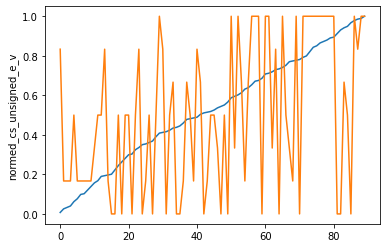

In [134]:
sns.lineplot(data=trials.normed_cs_unsigned_e_v)
sns.lineplot(data=tmp)

In [132]:
list(zip(tmp[30:], trials.normed_signed_e_v[30:], trials.outcome[30:], trials.n_red[30:]))

[(0.8333333333, 0.41666666666666663, -1, 6),
 (0.0, 0.41666666666666663, -1, 6),
 (0.5, 0.6666666666666666, 1, 2),
 (0.6666666667, 0.75, 1, 3),
 (0.0, 0.5833333333333333, 1, 1),
 (0.0, 0.6666666666666666, 1, 2),
 (0.1666666667, 0.8333333333333333, 1, 4),
 (0.6666666667, 0.9166666666666667, 1, 5),
 (0.5, 0.41666666666666663, -1, 6),
 (0.1666666667, 0.41666666666666663, -1, 6),
 (0.8333333333, 0.41666666666666663, -1, 6),
 (0.6666666667, 0.1666666666666667, -1, 3),
 (0.0, 0.6666666666666666, 1, 2),
 (0.1666666667, 0.41666666666666663, -1, 6),
 (0.5, 0.41666666666666663, -1, 6),
 (0.5, 0.6666666666666666, 1, 2),
 (0.3333333333, 0.25, -1, 4),
 (0.0, 0.33333333333333337, -1, 5),
 (0.5, 0.6666666666666666, 1, 2),
 (0.0, 0.8333333333333333, 1, 4),
 (1.0, 0.0, -1, 1),
 (0.3333333333, 0.33333333333333337, -1, 5),
 (1.0, 0.33333333333333337, -1, 5),
 (0.6666666667, 0.75, 1, 3),
 (0.1666666667, 0.9166666666666667, 1, 5),
 (0.6666666667, 0.33333333333333337, -1, 5),
 (1.0, 0.8333333333333333, 1, 4